In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext qgis_ipython
%qgis --verbose

from qgis.core import Qgis, QgsProject, QgsMapSettings

Application state:
QGIS_PREFIX_PATH env var:		
Prefix:		/Users/david/Applications/QGIS.app/Contents/MacOS
Plugin Path:		/Users/david/Applications/QGIS.app/Contents/MacOS/../PlugIns/qgis
Package Data Path:	/Users/david/Applications/QGIS.app/Contents/MacOS/../Resources
Active Theme Name:	
Active Theme Path:	/Users/david/Applications/QGIS.app/Contents/MacOS/../Resources/resources/themes//icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	/Users/david/Applications/QGIS.app/Contents/MacOS/../Resources/svg/
		/Users/david/Library/Application Support/profiles/default/svg/
User DB Path:	/Users/david/Applications/QGIS.app/Contents/MacOS/../Resources/resources/qgis.db
Auth DB Path:	/Users/david/Library/Application Support/profiles/default/qgis-auth.db

Qgis 3.6.2-Noosa initialized......


In [3]:
from pathlib import Path 
projectpath = Path('./data/france_parts.qgs')
prj = QgsProject()
prj.read(str(projectpath.absolute()))

True

In [4]:
from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice
from qgis.core import QgsMapRendererParallelJob

layers = prj.mapLayersByName('france_parts')

print(layers, len(layers))

xt     = layers[0].extent()
width  = 1200
height = int(width*xt.height()/xt.width())

options = QgsMapSettings()
options.setLayers(layers)
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
       
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

[<qgis._core.QgsVectorLayer object at 0x108098168>] 1


In [5]:

width, height = image.width(), image.height()

img = image.convertToFormat(QImage.Format_RGBA8888)
ptr = img.constBits()
ptr.setsize(height * width * 4)
arr = np.frombuffer(ptr, np.uint8).reshape((height, width, 4))

1200 501


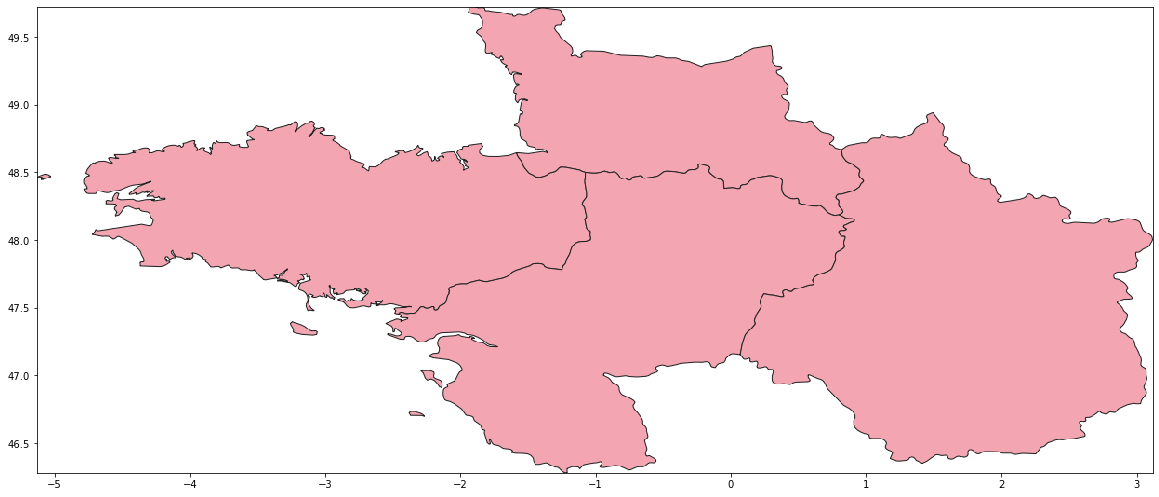

In [6]:
print(width,height)
xt = layers[0].extent()
plt.figure(figsize=(20,20))
plt.imshow(arr, extent=(xt.xMinimum(),xt.xMaximum(),xt.yMinimum(),xt.yMaximum()))